In [1]:
# Définir le chemin du fichier
fichier = 'identity_CelebA.txt'

# Initialiser un ensemble (set) pour stocker les labels uniques
labels_uniques = set()
nombre_images = 0

# Lire le fichier et extraire les labels
with open(fichier, 'r') as f:
    for ligne in f:
        # Diviser chaque ligne en mots
        mots = ligne.split()
        
        # Récupérer le label (le dernier mot sur la ligne)
        label = mots[-1]
        
        # Ajouter le label à l'ensemble des labels uniques
        labels_uniques.add(label)
        nombre_images += 1

# Imprimer le nombre de labels uniques
nombre_labels = len(labels_uniques)
print(f"Il y a {nombre_labels} labels différents dans le fichier.")
print(f"Il y a {nombre_images} images différentes dans le fichier.")


Il y a 10177 labels différents dans le fichier.
Il y a 202599 images différentes dans le fichier.


In [2]:
from collections import defaultdict

# Définir le chemin du fichier d'entrée et de sortie
fichier_entree = 'identity_CelebA.txt'
fichier_sortie = 'celebrity_trie.txt'

# Initialiser un dictionnaire par label pour stocker les données triées
donnees_par_label = defaultdict(list)

# Lire le fichier et trier les données par label
with open(fichier_entree, 'r') as f:
    for ligne in f:
        mots = ligne.split()
        label = int(mots[-1])  # Convertir le label en entier
        donnees_par_label[label].append(ligne)

# Trier les données par label
donnees_triees = []
for label in sorted(donnees_par_label.keys()):
    donnees_triees.extend(donnees_par_label[label])

# Écrire les données triées dans un nouveau fichier
with open(fichier_sortie, 'w') as f_sortie:
    f_sortie.writelines(donnees_triees)

print(f"Les données ont été triées par label et enregistrées dans {fichier_sortie}.")


Les données ont été triées par label et enregistrées dans celebrity_trie.txt.


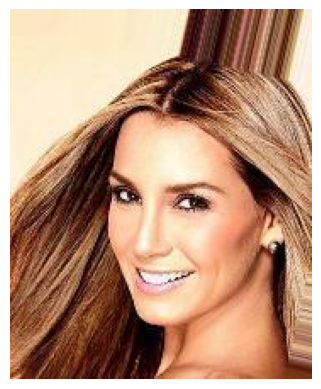

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def afficher_image(chemin_image):
    # Charger l'image
    img = mpimg.imread(chemin_image)

    # Afficher l'image
    plt.imshow(img)
    plt.axis('off')  # Désactiver les axes
    plt.show()

# Exemple d'utilisation
chemin_image = '../../Projet IAI3/img_align_celeba/000001.jpg'
afficher_image(chemin_image)


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def charger_images_de_fichier(fichier, nombre_images):
    images_model_entrainement = []
    images_model_validation = []
    images_model_test = []

    nombre_images_entrainement = int(nombre_images * 0.6)
    nombre_images_validation = int(nombre_images * 0.2)

    nombre_images_traitees = 0

    # Utiliser un ensemble pour stocker les classes déjà ajoutées
    classes_ajoutees = set()

    with open(fichier, 'r') as f:
        for ligne in f:
            # Diviser chaque ligne en mots
            mots = ligne.split()

            # Récupérer le nom de l'image et le label
            nom_image, label = mots[0], mots[1]

            # Construire le chemin complet de l'image (ajustez le chemin selon votre structure de dossier)
            chemin_image = f"../../Projet IAI3/img_align_celeba/{nom_image}"

            # Charger l'image
            img = mpimg.imread(chemin_image)

            # Extraire le nom de la classe à partir du label
            classe = f'class_{label}'

            # Vérifier si la classe a déjà été ajoutée
            if classe not in classes_ajoutees:
                # Ajouter la classe à l'ensemble d'entraînement
                classes_ajoutees.add(classe)

                # Ajouter la classe à l'ensemble de validation
                classes_ajoutees.add(classe)

            if nombre_images_traitees < nombre_images_entrainement:
                images_model_entrainement.append((chemin_image, img, label))
            elif nombre_images_traitees < nombre_images_entrainement + nombre_images_validation:
                images_model_validation.append((chemin_image, img, label))
            else:
                images_model_test.append((chemin_image, img, label))

            nombre_images_traitees += 1

            # Vérifier si le nombre d'images souhaité a été atteint
            if nombre_images_traitees == nombre_images:
                break

    return images_model_entrainement, images_model_validation, images_model_test


In [6]:
#Création des ensembles de validation, test et d'entrainement

fichier_celebrity = 'identity_CelebA.txt'
liste_images = charger_images_de_fichier(fichier_celebrity, 5000)


def test_list(liste):

    # Afficher les images avec leur label
    for chemin_image, img, label in liste:
        plt.imshow(img)
        plt.title(f"Label: {label} & Chemin Image : {chemin_image}")
        plt.axis('off')  # Désactiver les axes
        plt.show()

liste_images_entrainement = liste_images[0]
liste_images_validation = liste_images[1]
liste_images_test = liste_images[2]

#print(f"test liste entrainement")
#test_list(liste_images_entrainement)
#print(f"test liste test")
#test_list(liste_images_test)
#print(f"test liste validation")
#test_list(liste_images_validation)

In [7]:
import os
import shutil

# Définir le répertoire principal
train_dir = 'data/train'
validation_dir = 'data/validation'

# Créer les répertoires s'ils n'existent pas
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Copier les images d'entraînement
for chemin_image, img, label in liste_images_entrainement:
    # Extraire le nom de la classe à partir du label
    classe = f'class_{label}'

    # Construire le chemin de destination pour l'entraînement
    destination_path = os.path.join(train_dir, classe, os.path.basename(chemin_image))

    # Créer le répertoire de classe s'il n'existe pas
    os.makedirs(os.path.join(train_dir, classe), exist_ok=True)

    # Copier l'image dans le répertoire d'entraînement
    shutil.copy(chemin_image, destination_path)

# Copier les images de validation
for chemin_image, img, label in liste_images_validation:
    # Extraire le nom de la classe à partir du label
    classe = f'class_{label}'

    # Construire le chemin de destination pour la validation
    destination_path = os.path.join(validation_dir, classe, os.path.basename(chemin_image))

    # Créer le répertoire de classe s'il n'existe pas
    os.makedirs(os.path.join(validation_dir, classe), exist_ok=True)

    # Copier l'image dans le répertoire de validation
    shutil.copy(chemin_image, destination_path)



In [9]:
import os
import shutil

def verifier_repertoires(train_dir, validation_dir, nb_classe):
    # Liste des classes dans le répertoire d'entraînement
    classes_train = os.listdir(train_dir)

    # Liste des classes dans le répertoire de validation
    classes_validation = os.listdir(validation_dir)

    # Vérifier que chaque classe dans train est aussi dans validation
    for classe in classes_train:
        if classe not in classes_validation:
            # Supprimer le répertoire de classe dans train
            shutil.rmtree(os.path.join(train_dir, classe))
        else:
            nb_classe = nb_classe + 1

    # Vérifier que chaque classe dans validation est aussi dans train
    for classe in classes_validation:
        if classe not in classes_train:
            # Supprimer le répertoire de classe dans validation
            shutil.rmtree(os.path.join(validation_dir, classe))

    # Vérifier le nombre d'images dans chaque classe
    for classe in classes_train:
        train_images = os.listdir(os.path.join(train_dir, classe))
        validation_images = os.listdir(os.path.join(validation_dir, classe))

    # Vérifier et équilibrer le nombre d'images dans chaque classe
    for classe in classes_train:
        train_images = os.listdir(os.path.join(train_dir, classe))
        validation_images = os.listdir(os.path.join(validation_dir, classe))

        # Équilibrer le nombre d'images
        while len(train_images) != len(validation_images):
            if len(train_images) > len(validation_images):
                # Supprimer une image dans train
                image_to_remove = train_images.pop()
                os.remove(os.path.join(train_dir, classe, image_to_remove))
            else:
                # Supprimer une image dans validation
                image_to_remove = validation_images.pop()
                os.remove(os.path.join(validation_dir, classe, image_to_remove))

    return nb_classe

# Utilisation de la méthode
train_dir = 'data/train'
validation_dir = 'data/validation'
nb_classe = 0
nb_classe = verifier_repertoires(train_dir, validation_dir, nb_classe)
print(f"Nombre de classes : {nb_classe}")


Nombre de classes : 335


In [10]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

def augmenter_donnees(repertoire, output_dir, nb_images_augmentees=10):
    datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

    # Parcourir tous les sous-dossiers dans le répertoire spécifié
    for classe in os.listdir(repertoire):
        classe_path = os.path.join(repertoire, classe)

        # Vérifier si c'est un dossier
        if os.path.isdir(classe_path):
            for fichier in os.listdir(classe_path):
                # Construire le chemin complet de l'image
                img_path = os.path.join(classe_path, fichier)

                # Charger l'image
                img = load_img(img_path)
                x = img_to_array(img)
                x = x.reshape((1,) + x.shape)

                # Créer un répertoire pour les images augmentées s'il n'existe pas
                output_classe_dir = os.path.join(output_dir, classe)
                os.makedirs(output_classe_dir, exist_ok=True)

                # Générer des images augmentées et les sauvegarder
                i = 0
                for batch in datagen.flow(x, batch_size=1, save_to_dir=output_classe_dir,
                                          save_prefix=f'{fichier[:-4]}_aug', save_format='jpeg'):
                    i += 1
                    if i > nb_images_augmentees:
                        break

# Utilisation de la fonction pour les données d'entraînement
augmenter_donnees('data/train', 'data/train_augmented')

# Utilisation de la fonction pour les données de validation
augmenter_donnees('data/validation', 'data/validation_augmented')


2024-02-07 10:27:21.799643: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-07 10:27:21.844766: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-07 10:27:22.024696: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-07 10:27:22.024788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-07 10:27:22.059676: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [11]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Modèle 1
train_dir = './data/train_augmented'
validation_dir = './data/validation_augmented'
img_height = 218
img_width = 178
batch_size = 16
epochs = 10

# Créer une architecture de réseau de neurones
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(nb_classe, activation='softmax'))

# Compiler le modèle
model1.compile(loss='categorical_crossentropy',
               optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
               metrics=['accuracy'])

# Configuration de l'augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

# Charger les données
train_generator1 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

validation_generator1 = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Entraîner le modèle 1
model1.fit_generator(
    train_generator1,
    steps_per_epoch=train_generator1.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator1,
    validation_steps=validation_generator1.n // batch_size)

# Sauvegarder uniquement les poids nécessaires du modèle 1
model1.save_weights('poids_modele1_partiels.h5')



Found 3714 images belonging to 335 classes.
Found 3717 images belonging to 335 classes.
Epoch 1/10


/tmp/ipykernel_10055/3991223416.py:58: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model1.fit_generator(


232/232 [==============================] - 103s 441ms/step - loss: 5.8189 - accuracy: 0.0030 - val_loss: 5.8135 - val_accuracy: 0.0065
Epoch 2/10
232/232 [==============================] - 98s 424ms/step - loss: 5.7733 - accuracy: 0.0062 - val_loss: 5.9028 - val_accuracy: 0.0024
Epoch 3/10
232/232 [==============================] - 104s 446ms/step - loss: 5.6511 - accuracy: 0.0111 - val_loss: 5.8149 - val_accuracy: 5.3879e-04
Epoch 4/10
232/232 [==============================] - 99s 427ms/step - loss: 5.5089 - accuracy: 0.0138 - val_loss: 6.1582 - val_accuracy: 0.0027
Epoch 5/10
232/232 [==============================] - 98s 423ms/step - loss: 5.1941 - accuracy: 0.0233 - val_loss: 6.3008 - val_accuracy: 0.0046
Epoch 6/10
232/232 [==============================] - 94s 406ms/step - loss: 4.7756 - accuracy: 0.0489 - val_loss: 6.6221 - val_accuracy: 0.0051
Epoch 7/10
232/232 [==============================] - 100s 431ms/step - loss: 4.4415 - accuracy: 0.0635 - val_loss: 7.1067 - val_accura

In [14]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Modèle 2
# Définir les répertoires de données
train_dir = './data/train_augmented'
validation_dir = './data/validation_augmented'

img_height = 218
img_width = 178
batch_size = 16
epochs = 20

# Construire la partie du modèle du premier code
base_model = Sequential()
base_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
base_model.add(MaxPooling2D((2, 2)))
base_model.add(Conv2D(64, (3, 3), activation='relu'))
base_model.add(MaxPooling2D((2, 2)))
base_model.add(Conv2D(128, (3, 3), activation='relu'))
base_model.add(MaxPooling2D((2, 2)))
base_model.add(Flatten())
base_model.add(Dense(256, activation='relu'))
base_model.add(Dropout(0.5))

# Ajouter votre propre top model
top_model = Sequential()
top_model.add(Dense(nb_classe, activation='softmax'))  # Utiliser softmax pour plusieurs classes

# Charger les poids dans le modèle 2
base_model.load_weights('poids_modele1_partiels.h5', by_name=True)


# Ajouter le top model au modèle de base
model2 = Model(inputs=base_model.input, outputs=top_model(base_model.output))

# Geler les premières couches
for layer in model2.layers[:25]:
    layer.trainable = False

# Compiler le modèle
model2.compile(loss='categorical_crossentropy',  # Utiliser categorical_crossentropy pour plusieurs classes
               optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
               metrics=['accuracy'])

# Configuration de l'augmentation des données
train_generator2 = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Utiliser categorical pour plusieurs classes
    shuffle=True)

validation_generator2 = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Utiliser categorical pour plusieurs classes
    shuffle=False)

# Entraîner le modèle 2
model2.fit_generator(
    train_generator2,
    steps_per_epoch=train_generator2.n // batch_size,
    epochs=epochs,
    validation_data=validation_generator2,
    validation_steps=validation_generator2.n // batch_size)

model2.save('modele2.h5')


Found 3714 images belonging to 335 classes.
Found 3717 images belonging to 335 classes.
Epoch 1/20


/tmp/ipykernel_10055/1578048536.py:65: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model2.fit_generator(


232/232 [==============================] - 58s 247ms/step - loss: 5.8179 - accuracy: 0.0027 - val_loss: 5.8157 - val_accuracy: 8.0819e-04
Epoch 2/20
232/232 [==============================] - 55s 239ms/step - loss: 5.8179 - accuracy: 0.0016 - val_loss: 5.8157 - val_accuracy: 8.0819e-04
Epoch 3/20
232/232 [==============================] - 56s 240ms/step - loss: 5.8176 - accuracy: 0.0041 - val_loss: 5.8157 - val_accuracy: 8.0819e-04
Epoch 4/20
232/232 [==============================] - 55s 235ms/step - loss: 5.8208 - accuracy: 0.0030 - val_loss: 5.8157 - val_accuracy: 8.0819e-04
Epoch 5/20
232/232 [==============================] - 56s 241ms/step - loss: 5.8204 - accuracy: 0.0038 - val_loss: 5.8157 - val_accuracy: 8.0819e-04
Epoch 6/20
232/232 [==============================] - 55s 238ms/step - loss: 5.8196 - accuracy: 0.0041 - val_loss: 5.8157 - val_accuracy: 8.0819e-04
Epoch 7/20
232/232 [==============================] - 53s 229ms/step - loss: 5.8186 - accuracy: 0.0030 - val_loss: 5.

/home/antoine/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 24ms/step
81


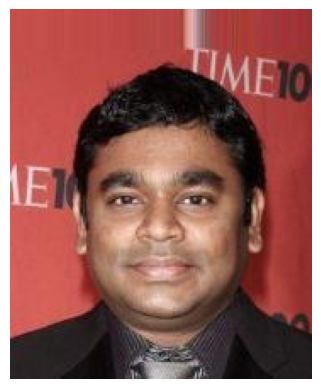

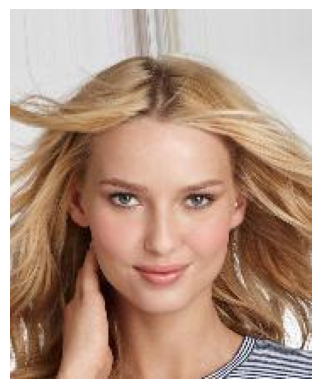

In [38]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# Charger l'image à tester
img_path = '../../Projet IAI3/img_align_celeba/038132.jpg'
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Ajouter une dimension batch

# Prétraiter l'image
img_array = img_array / 255.0  # Normaliser les pixels si nécessaire

# Charger le modèle
model2 = load_model('modele2.h5')
# Faire une prédiction
predictions = model.predict(img_array)

# Interpréter les résultats
predicted_class = np.argmax(predictions)

print(predicted_class)
afficher_image('../../Projet IAI3/img_align_celeba/038132.jpg')
afficher_image('../../Projet IAI3/img_align_celeba/035082.jpg')